In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Prétraitement
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modèles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Métriques
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('dataset_planification_transport_LK.csv')
df.head()

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1


In [3]:
df.shape

(2000, 15)

In [4]:
df.describe()

,trajet_id,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,carburant_litre,satisfaction_client
count,2000.000000,1840.000000,1840.000000,1840.000000,1840.000000,1836.000000,1840.000000,1840.000000,2000.00000
mean,1000.500000,352.983696,6.775326,91.687500,6726.460326,37.994009,50.315217,47.511196,2.99750
std,577.494589,173.609929,2.975420,51.889587,3071.395956,19.120825,13.968371,18.564397,1.39695
min,1.000000,50.000000,1.500000,0.000000,1528.000000,5.000000,30.000000,15.000000,1.00000
25%,500.750000,203.000000,4.200000,48.000000,4008.000000,21.000000,40.000000,31.575000,2.00000
50%,1000.500000,355.000000,6.900000,93.000000,6599.000000,39.000000,50.000000,47.350000,3.00000
75%,1500.250000,503.000000,9.300000,137.000000,9527.000000,54.000000,60.000000,63.500000,4.00000
max,2000.000000,649.000000,12.000000,179.000000,11997.000000,79.000000,70.000000,80.000000,5.00000


In [5]:
df.drop_duplicates()

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Lomé,NaN,428.0,9.1,137.0,1851.0,33.0,50.0,Standard,Lundi,Matin,Moyenne,38.2,4
1996,1997,Tsévié,Tsévié,406.0,NaN,NaN,6832.0,68.0,70.0,Standard,Dimanche,Après-midi,Moyenne,62.7,3
1997,1998,Atakpamé,Sokodé,615.0,2.2,28.0,3754.0,9.0,50.0,Standard,Vendredi,Soir,NaN,46.0,1
1998,1999,Tsévié,Tsévié,428.0,11.7,0.0,4182.0,14.0,30.0,Climatisé,Lundi,Matin,Bonne,18.7,4


In [6]:
df.isnull().sum()

trajet_id                0
ville_depart           156
ville_arrivee          160
distance_km            160
duree_prevue_h         160
retard_min             160
prix_billet            160
nb_passagers           164
capacite_bus           160
type_bus               160
jour_semaine           160
periode_depart         160
condition_route        160
carburant_litre        160
satisfaction_client      0
dtype: int64

In [7]:
# Analyse des valeurs manquantes
print("ANALYSE DES VALEURS MANQUANTES")
print("="*60)

missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Nb_Manquants': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Nb_Manquants'] > 0].sort_values(
    'Pourcentage', ascending=False
)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
    

ANALYSE DES VALEURS MANQUANTES
        Colonne  Nb_Manquants  Pourcentage
   nb_passagers           164          8.2
 duree_prevue_h           160          8.0
    distance_km           160          8.0
     retard_min           160          8.0
  ville_arrivee           160          8.0
   jour_semaine           160          8.0
    prix_billet           160          8.0
   capacite_bus           160          8.0
       type_bus           160          8.0
condition_route           160          8.0
 periode_depart           160          8.0
carburant_litre           160          8.0
   ville_depart           156          7.8


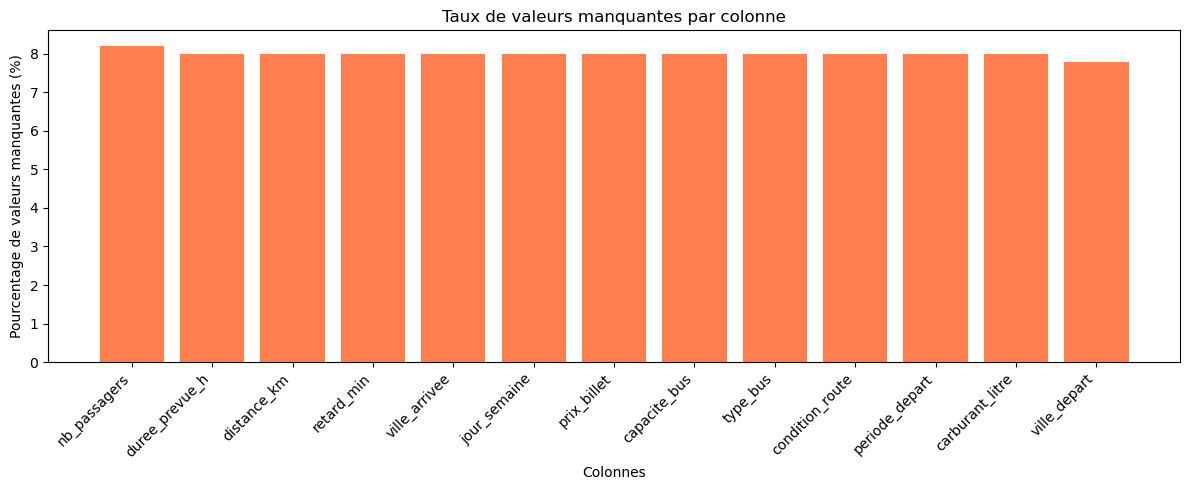

In [8]:
# Visualisation
plt.figure(figsize=(12, 5))
plt.bar(missing_data['Colonne'], missing_data['Pourcentage'], color='coral')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de valeurs manquantes (%)')
plt.title('Taux de valeurs manquantes par colonne')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
df.describe().round(2)

,trajet_id,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,carburant_litre,satisfaction_client
count,2000.00,1840.00,1840.00,1840.00,1840.00,1836.00,1840.00,1840.00,2000.0
mean,1000.50,352.98,6.78,91.69,6726.46,37.99,50.32,47.51,3.0
std,577.49,173.61,2.98,51.89,3071.40,19.12,13.97,18.56,1.4
min,1.00,50.00,1.50,0.00,1528.00,5.00,30.00,15.00,1.0
25%,500.75,203.00,4.20,48.00,4008.00,21.00,40.00,31.58,2.0
50%,1000.50,355.00,6.90,93.00,6599.00,39.00,50.00,47.35,3.0
75%,1500.25,503.00,9.30,137.00,9527.00,54.00,60.00,63.50,4.0
max,2000.00,649.00,12.00,179.00,11997.00,79.00,70.00,80.00,5.0


# Analyse de la satisfaction client (variable à prédire)

In [10]:
# Distribution de la satisfaction client
print("DISTRIBUTION DE LA SATISFACTION CLIENT")

satisfaction_counts = df['satisfaction_client'].value_counts().sort_index()
print(satisfaction_counts)
print(f"\nMoyenne: {df['satisfaction_client'].mean():.2f}")
print(f"Médiane: {df['satisfaction_client'].median():.0f}")


DISTRIBUTION DE LA SATISFACTION CLIENT
satisfaction_client
1    395
2    382
3    442
4    395
5    386
Name: count, dtype: int64

Moyenne: 3.00
Médiane: 3


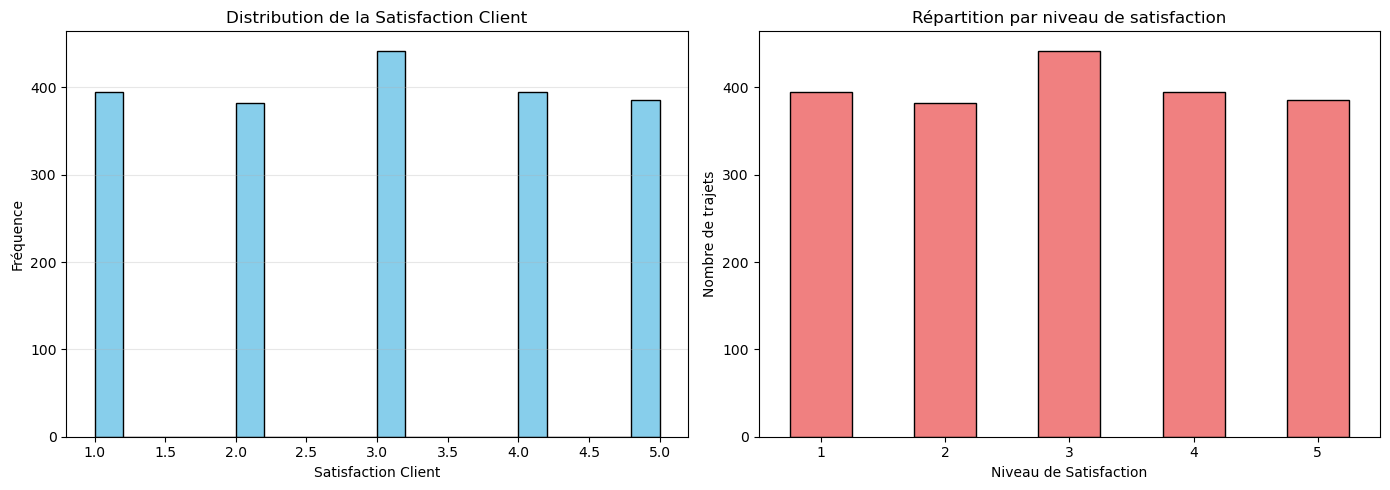

In [11]:
# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['satisfaction_client'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Satisfaction Client')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Satisfaction Client')
axes[0].grid(axis='y', alpha=0.3)

# Diagramme en barres
satisfaction_counts.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Niveau de Satisfaction')
axes[1].set_ylabel('Nombre de trajets')
axes[1].set_title('Répartition par niveau de satisfaction')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Analyse des variables catégorielles

In [12]:
# Variables catégorielles
categorical_vars = ['ville_depart', 'ville_arrivee', 'type_bus', 
                    'jour_semaine', 'periode_depart', 'condition_route']

print("ANALYSE DES VARIABLES CATÉGORIELLES")

for var in categorical_vars:
    if var in df.columns:
        print(f"\n{var.upper()}:")
        print(df[var].value_counts())
        print(f"Nombre de catégories uniques: {df[var].nunique()}")

ANALYSE DES VARIABLES CATÉGORIELLES

VILLE_DEPART:
ville_depart
Atakpamé    327
Sokodé      313
Kara        311
Tsévié      306
Lomé        301
Dapaong     286
Name: count, dtype: int64
Nombre de catégories uniques: 6

VILLE_ARRIVEE:
ville_arrivee
Sokodé      330
Atakpamé    316
Lomé        312
Kara        302
Tsévié      293
Dapaong     287
Name: count, dtype: int64
Nombre de catégories uniques: 6

TYPE_BUS:
type_bus
VIP          641
Climatisé    620
Standard     579
Name: count, dtype: int64
Nombre de catégories uniques: 3

JOUR_SEMAINE:
jour_semaine
Mercredi    289
Jeudi       278
Vendredi    268
Samedi      261
Mardi       257
Lundi       254
Dimanche    233
Name: count, dtype: int64
Nombre de catégories uniques: 7

PERIODE_DEPART:
periode_depart
Soir          635
Après-midi    620
Matin         585
Name: count, dtype: int64
Nombre de catégories uniques: 3

CONDITION_ROUTE:
condition_route
Mauvaise    634
Bonne       613
Moyenne     593
Name: count, dtype: int64
Nombre de catégorie

# Détection des incohérences

In [13]:

print("DÉTECTION DES INCOHÉRENCES")

# 1. Surcharge des bus (passagers > capacité)
surcharge = df[df['nb_passagers'] > df['capacite_bus']]
print(f"\n1. BUS SURCHARGÉS:")
print(f"   Nombre de trajets: {len(surcharge)} ({len(surcharge)/len(df)*100:.2f}%)")

if len(surcharge) > 0:
    print(f"   Surcharge moyenne: {(surcharge['nb_passagers'] - surcharge['capacite_bus']).mean():.1f} passagers")
    print(f"   Surcharge max: {(surcharge['nb_passagers'] - surcharge['capacite_bus']).max():.0f} passagers")

DÉTECTION DES INCOHÉRENCES

1. BUS SURCHARGÉS:
   Nombre de trajets: 549 (27.45%)
   Surcharge moyenne: 14.1 passagers
   Surcharge max: 39 passagers


In [14]:
# 2. Valeurs négatives impossibles
print(f"\n2. VALEURS NÉGATIVES:")
numeric_cols = ['distance_km', 'duree_prevue_h', 'prix_billet', 'nb_passagers', 'carburant_litre']
for col in numeric_cols:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            print(f"   {col}: {neg_count} valeurs négatives")


2. VALEURS NÉGATIVES:


In [15]:
# 3. Taux de remplissage aberrants
df['taux_remplissage_temp'] = (df['nb_passagers'] / df['capacite_bus'] * 100)
aberrant = df[df['taux_remplissage_temp'] > 150]
print(f"\n3. TAUX DE REMPLISSAGE > 150%:")
print(f"   Nombre de trajets: {len(aberrant)}")



3. TAUX DE REMPLISSAGE > 150%:
   Nombre de trajets: 161


In [16]:
# 4. Cohérence distance/durée
df['vitesse_moy_temp'] = df['distance_km'] / df['duree_prevue_h']
vitesse_anormale = df[(df['vitesse_moy_temp'] < 20) | (df['vitesse_moy_temp'] > 120)]
print(f"\n4. VITESSE MOYENNE ANORMALE (<20 km/h ou >120 km/h):")
print(f"   Nombre de trajets: {len(vitesse_anormale)}")

df.drop(['taux_remplissage_temp', 'vitesse_moy_temp'], axis=1, inplace=True)


4. VITESSE MOYENNE ANORMALE (<20 km/h ou >120 km/h):
   Nombre de trajets: 475


# Traitement des valeurs

In [17]:
# Copie pour le nettoyage
df_clean = df.copy()

print("TRAITEMENT DES VALEURS MANQUANTES")

# Stratégie d'imputation
# Variables numériques: médiane (robuste aux outliers)
numeric_cols = ['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet', 
                'nb_passagers', 'capacite_bus', 'carburant_litre']

for col in numeric_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"✓ {col}: {missing_count} valeurs imputées avec la médiane ({median_val:.2f})")

# Variables catégorielles: mode (valeur la plus fréquente)
categorical_cols = ['ville_depart', 'ville_arrivee', 'type_bus', 
                    'jour_semaine', 'periode_depart', 'condition_route']

for col in categorical_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"✓ {col}: {missing_count} valeurs imputées avec le mode ('{mode_val}')")

# Variable cible: suppression des lignes manquantes
if df_clean['satisfaction_client'].isnull().sum() > 0:
    missing_target = df_clean['satisfaction_client'].isnull().sum()
    df_clean = df_clean.dropna(subset=['satisfaction_client'])
    print(f"\n✓ satisfaction_client: {missing_target} lignes supprimées")

print(f"\nDimensions après traitement: {df_clean.shape}")
print(f"Valeurs manquantes restantes: {df_clean.isnull().sum().sum()}")

TRAITEMENT DES VALEURS MANQUANTES
✓ distance_km: 160 valeurs imputées avec la médiane (355.00)
✓ duree_prevue_h: 160 valeurs imputées avec la médiane (6.90)
✓ retard_min: 160 valeurs imputées avec la médiane (93.00)
✓ prix_billet: 160 valeurs imputées avec la médiane (6599.00)
✓ nb_passagers: 164 valeurs imputées avec la médiane (39.00)
✓ capacite_bus: 160 valeurs imputées avec la médiane (50.00)
✓ carburant_litre: 160 valeurs imputées avec la médiane (47.35)
✓ ville_depart: 156 valeurs imputées avec le mode ('Atakpamé')
✓ ville_arrivee: 160 valeurs imputées avec le mode ('Sokodé')
✓ type_bus: 160 valeurs imputées avec le mode ('VIP')
✓ jour_semaine: 160 valeurs imputées avec le mode ('Mercredi')
✓ periode_depart: 160 valeurs imputées avec le mode ('Soir')
✓ condition_route: 160 valeurs imputées avec le mode ('Mauvaise')

Dimensions après traitement: (2000, 15)
Valeurs manquantes restantes: 0


/tmp/ipykernel_10504/2131513675.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
/tmp/ipykernel_10504/2131513675.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# corrections des incohérences

In [18]:
# Correction des incohérences
print("CORRECTION DES INCOHÉRENCES")

# 1. Correction de la surcharge (plafonnement à la capacité)
surcharge_before = (df_clean['nb_passagers'] > df_clean['capacite_bus']).sum()
df_clean.loc[df_clean['nb_passagers'] > df_clean['capacite_bus'], 'nb_passagers'] =     df_clean.loc[df_clean['nb_passagers'] > df_clean['capacite_bus'], 'capacite_bus']
print(f"✓ Surcharge corrigée: {surcharge_before} trajets ajustés")

CORRECTION DES INCOHÉRENCES
✓ Surcharge corrigée: 614 trajets ajustés


In [19]:
# 2. Correction des valeurs négatives
numeric_cols = ['distance_km', 'duree_prevue_h', 'retard_min', 
                'prix_billet', 'nb_passagers', 'carburant_litre']

for col in numeric_cols:
    neg_count = (df_clean[col] < 0).sum()
    if neg_count > 0:
        # Remplacer par la médiane des valeurs positives
        median_positive = df_clean[df_clean[col] >= 0][col].median()
        df_clean.loc[df_clean[col] < 0, col] = median_positive
        print(f"✓ {col}: {neg_count} valeurs négatives corrigées")


In [20]:
# 3. Vérification finale
print(f"\n✓ Dataset nettoyé: {df_clean.shape}")
print(f"✓ Valeurs manquantes: {df_clean.isnull().sum().sum()}")
print(f"✓ Surcharges restantes: {(df_clean['nb_passagers'] > df_clean['capacite_bus']).sum()}")


✓ Dataset nettoyé: (2000, 15)
✓ Valeurs manquantes: 0
✓ Surcharges restantes: 0


# Features engineering

In [21]:
# Feature Engineering
print("CRÉATION DE NOUVELLES VARIABLES")

# 1. Taux de remplissage du bus (%)
df_clean['taux_remplissage'] = (df_clean['nb_passagers'] / df_clean['capacite_bus'] * 100)
print(f"✓ taux_remplissage créée (moyenne: {df_clean['taux_remplissage'].mean():.2f}%)")

# 2. Retard par kilomètre
df_clean['retard_par_km'] = df_clean['retard_min'] / df_clean['distance_km']
df_clean['retard_par_km'] = df_clean['retard_par_km'].replace([np.inf, -np.inf], 0)
print(f"✓ retard_par_km créée (moyenne: {df_clean['retard_par_km'].mean():.4f} min/km)")

# 3. Retard par heure
df_clean['retard_par_heure'] = df_clean['retard_min'] / df_clean['duree_prevue_h']
df_clean['retard_par_heure'] = df_clean['retard_par_heure'].replace([np.inf, -np.inf], 0)
print(f"✓ retard_par_heure créée (moyenne: {df_clean['retard_par_heure'].mean():.2f} min/h)")

# 4. Consommation par km
df_clean['conso_par_km'] = df_clean['carburant_litre'] / df_clean['distance_km']
df_clean['conso_par_km'] = df_clean['conso_par_km'].replace([np.inf, -np.inf], 0)
print(f"✓ conso_par_km créée (moyenne: {df_clean['conso_par_km'].mean():.4f} L/km)")

# 5. Efficacité économique (passagers * km / carburant)
df_clean['efficacite_economique'] = (df_clean['nb_passagers'] * df_clean['distance_km']) / (df_clean['carburant_litre'] + 1)
print(f"✓ efficacite_economique créée (moyenne: {df_clean['efficacite_economique'].mean():.2f})")

# 6. Revenu estimé du trajet
df_clean['revenu_trajet'] = df_clean['nb_passagers'] * df_clean['prix_billet']
print(f"✓ revenu_trajet créée (moyenne: {df_clean['revenu_trajet'].mean():.2f} FCFA)")

# 7. Vitesse moyenne
df_clean['vitesse_moyenne'] = df_clean['distance_km'] / df_clean['duree_prevue_h']
df_clean['vitesse_moyenne'] = df_clean['vitesse_moyenne'].replace([np.inf, -np.inf], 0)
print(f"✓ vitesse_moyenne créée (moyenne: {df_clean['vitesse_moyenne'].mean():.2f} km/h)")

# 8. Indicateur de retard significatif (>30 min)
df_clean['retard_significatif'] = (df_clean['retard_min'] > 30).astype(int)
print(f"✓ retard_significatif créée ({df_clean['retard_significatif'].sum()} trajets avec retard >30min)")

# 9. Catégorie de remplissage
df_clean['categorie_remplissage'] = pd.cut(df_clean['taux_remplissage'], 
                                            bins=[0, 50, 80, 100], 
                                            labels=['Faible', 'Moyen', 'Élevé'])
print(f"✓ categorie_remplissage créée")

print(f"\nNombre total de variables: {df_clean.shape[1]}")

CRÉATION DE NOUVELLES VARIABLES
✓ taux_remplissage créée (moyenne: 70.18%)
✓ retard_par_km créée (moyenne: 0.3766 min/km)
✓ retard_par_heure créée (moyenne: 17.64 min/h)
✓ conso_par_km créée (moyenne: 0.1928 L/km)
✓ efficacite_economique créée (moyenne: 291.24)
✓ revenu_trajet créée (moyenne: 226292.42 FCFA)
✓ vitesse_moyenne créée (moyenne: 67.62 km/h)
✓ retard_significatif créée (1703 trajets avec retard >30min)
✓ categorie_remplissage créée

Nombre total de variables: 24


# visualisation des nouvelles variables

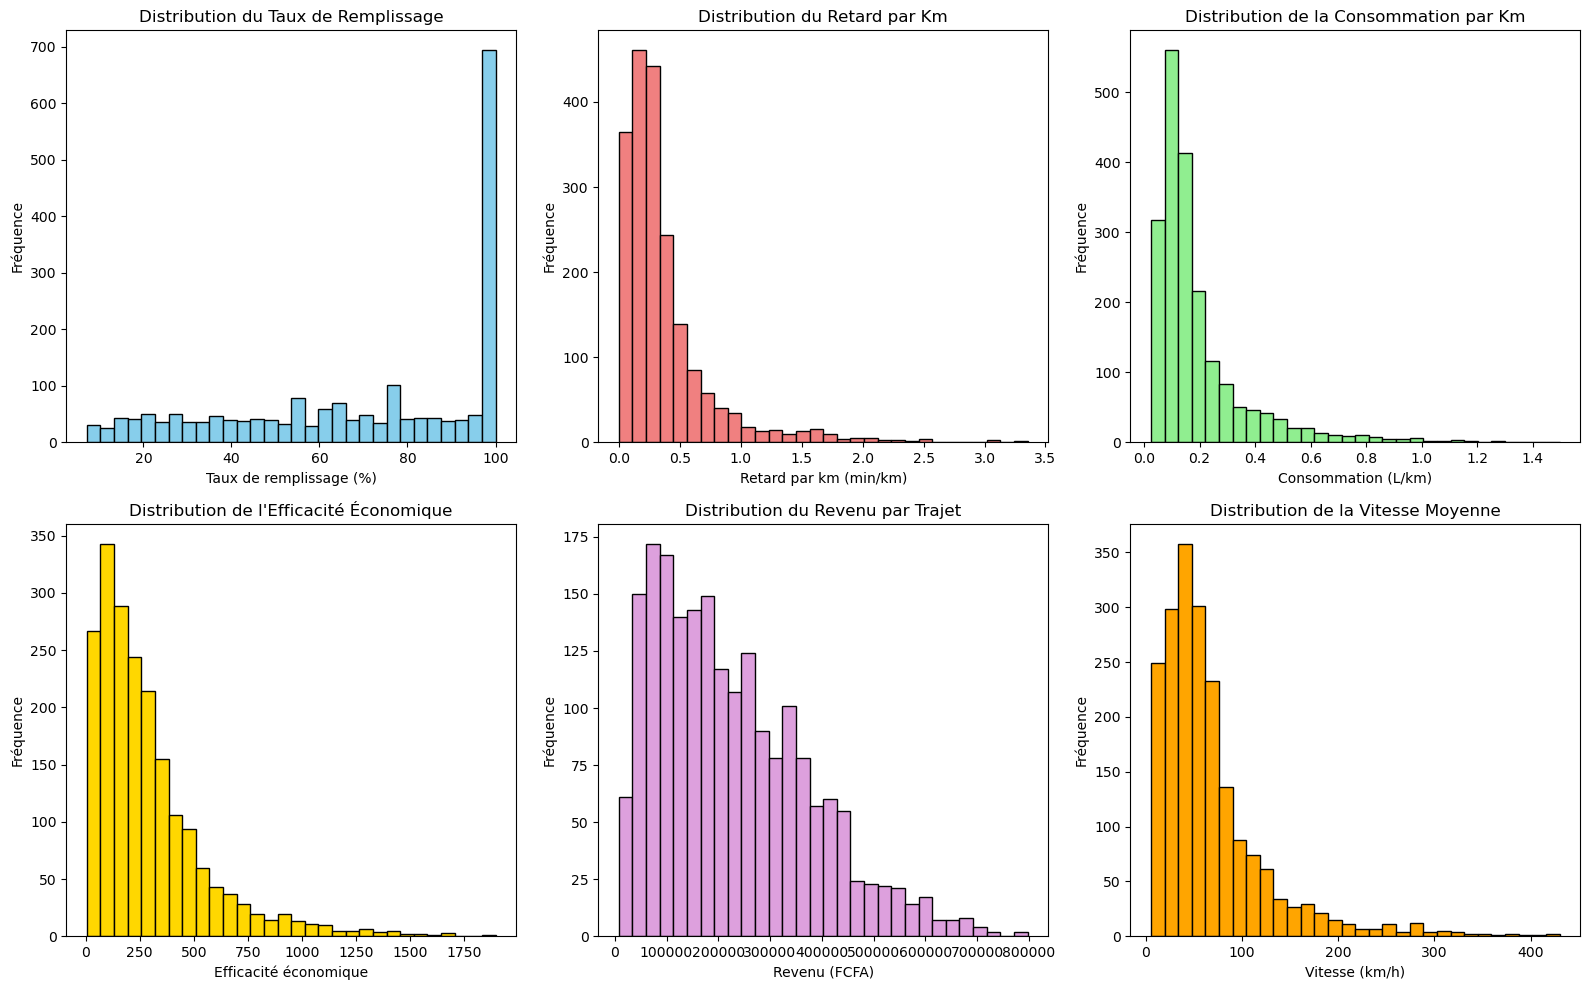

In [22]:
# Visualisation des variables créées
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Taux de remplissage
axes[0, 0].hist(df_clean['taux_remplissage'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution du Taux de Remplissage')
axes[0, 0].set_xlabel('Taux de remplissage (%)')
axes[0, 0].set_ylabel('Fréquence')

# 2. Retard par km
axes[0, 1].hist(df_clean['retard_par_km'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution du Retard par Km')
axes[0, 1].set_xlabel('Retard par km (min/km)')
axes[0, 1].set_ylabel('Fréquence')

# 3. Consommation par km
axes[0, 2].hist(df_clean['conso_par_km'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Distribution de la Consommation par Km')
axes[0, 2].set_xlabel('Consommation (L/km)')
axes[0, 2].set_ylabel('Fréquence')

# 4. Efficacité économique
axes[1, 0].hist(df_clean['efficacite_economique'], bins=30, color='gold', edgecolor='black')
axes[1, 0].set_title("Distribution de l'Efficacité Économique")
axes[1, 0].set_xlabel('Efficacité économique')
axes[1, 0].set_ylabel('Fréquence')

# 5. Revenu trajet
axes[1, 1].hist(df_clean['revenu_trajet'], bins=30, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution du Revenu par Trajet')
axes[1, 1].set_xlabel('Revenu (FCFA)')
axes[1, 1].set_ylabel('Fréquence')

# 6. Vitesse moyenne
axes[1, 2].hist(df_clean['vitesse_moyenne'], bins=30, color='orange', edgecolor='black')
axes[1, 2].set_title('Distribution de la Vitesse Moyenne')
axes[1, 2].set_xlabel('Vitesse (km/h)')
axes[1, 2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Analyse de correlation

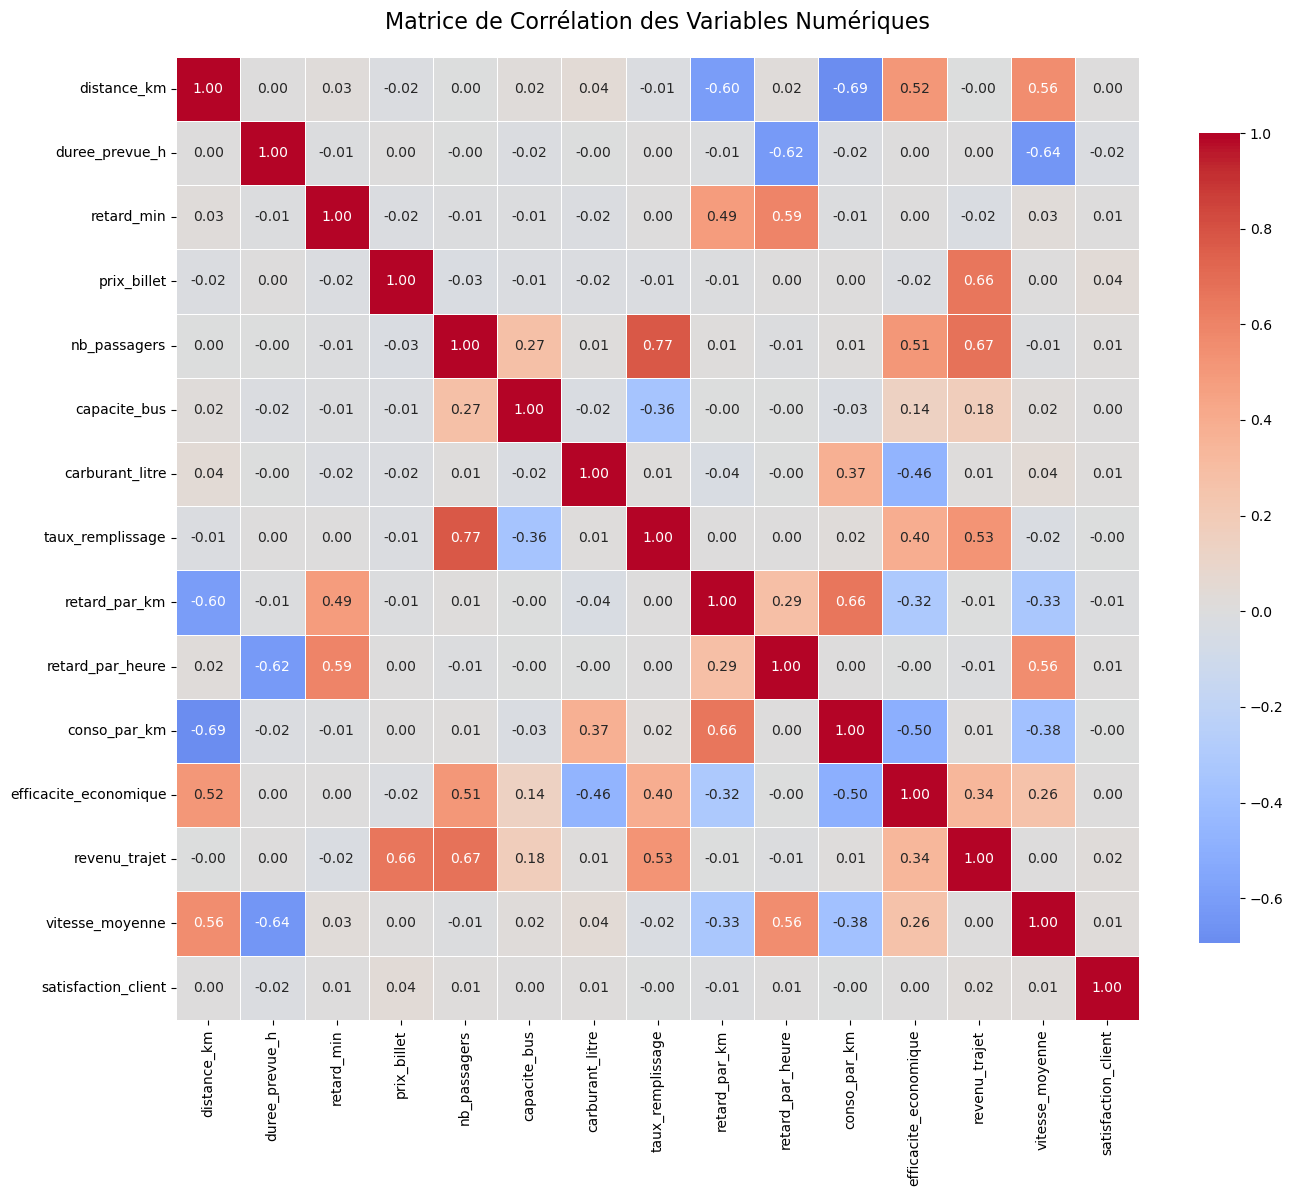


CORRÉLATIONS AVEC LA SATISFACTION CLIENT
prix_billet              0.037632
revenu_trajet            0.021006
vitesse_moyenne          0.014321
nb_passagers             0.008700
carburant_litre          0.007877
retard_par_heure         0.006024
retard_min               0.005713
capacite_bus             0.004850
efficacite_economique    0.004541
distance_km              0.004316
taux_remplissage        -0.001270
conso_par_km            -0.002021
retard_par_km           -0.011235
duree_prevue_h          -0.015066
Name: satisfaction_client, dtype: float64


In [23]:
# Matrice de corrélation
numeric_features = ['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet', 
                    'nb_passagers', 'capacite_bus', 'carburant_litre', 
                    'taux_remplissage', 'retard_par_km', 'retard_par_heure',
                    'conso_par_km', 'efficacite_economique', 'revenu_trajet',
                    'vitesse_moyenne', 'satisfaction_client']

correlation_matrix = df_clean[numeric_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Top corrélations avec satisfaction_client
print("\nCORRÉLATIONS AVEC LA SATISFACTION CLIENT")
print("="*60)
correlations = correlation_matrix['satisfaction_client'].drop('satisfaction_client').sort_values(ascending=False)
print(correlations)


# Préparation des données pour le ML

In [24]:
# Préparation pour le Machine Learning
print("PRÉPARATION DES DONNÉES POUR LE MACHINE LEARNING")
print("="*60)

# Séparation features et target
X = df_clean.drop(['satisfaction_client', 'trajet_id'], axis=1)
y = df_clean['satisfaction_client']

# Optionnel: convertir en classification binaire (satisfait vs non satisfait)
# Seuil: satisfaction >= 4 = Satisfait (1), sinon Non satisfait (0)
y_binary = (y >= 4).astype(int)

print(f"Dimensions de X: {X.shape}")
print(f"Dimensions de y: {y.shape}")
print(f"\nDistribution de y (original):")
print(y.value_counts().sort_index())
print(f"\nDistribution de y_binary (>= 4 = Satisfait):")
print(y_binary.value_counts())

# Définition des types de colonnes pour le pipeline
numeric_features = ['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet',
                    'nb_passagers', 'capacite_bus', 'carburant_litre',
                    'taux_remplissage', 'retard_par_km', 'retard_par_heure',
                    'conso_par_km', 'efficacite_economique', 'revenu_trajet',
                    'vitesse_moyenne']

categorical_features = ['ville_depart', 'ville_arrivee', 'type_bus',
                        'jour_semaine', 'periode_depart', 'condition_route',
                        'categorie_remplissage']

# Suppression de retard_significatif des features (trop corrélé avec retard_min)
if 'retard_significatif' in X.columns:
    X = X.drop('retard_significatif', axis=1)

print(f"\nVariables numériques ({len(numeric_features)}): {numeric_features}")
print(f"\nVariables catégorielles ({len(categorical_features)}): {categorical_features}")

PRÉPARATION DES DONNÉES POUR LE MACHINE LEARNING
Dimensions de X: (2000, 22)
Dimensions de y: (2000,)

Distribution de y (original):
satisfaction_client
1    395
2    382
3    442
4    395
5    386
Name: count, dtype: int64

Distribution de y_binary (>= 4 = Satisfait):
satisfaction_client
0    1219
1     781
Name: count, dtype: int64

Variables numériques (14): ['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet', 'nb_passagers', 'capacite_bus', 'carburant_litre', 'taux_remplissage', 'retard_par_km', 'retard_par_heure', 'conso_par_km', 'efficacite_economique', 'revenu_trajet', 'vitesse_moyenne']

Variables catégorielles (7): ['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine', 'periode_depart', 'condition_route', 'categorie_remplissage']


# Pipeline de pré-traitement

In [25]:
# Construction du pipeline de prétraitement
print("CONSTRUCTION DU PIPELINE DE PRÉTRAITEMENT")

# Pipeline pour les variables numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour les variables catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinaison avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✓ Pipeline créé avec succès!")
print(f"  - Transformateur numérique: Imputation (médiane) + Standardisation")
print(f"  - Transformateur catégoriel: Imputation (mode) + One-Hot Encoding")
print(f"\n✓ ColumnTransformer configuré pour {len(numeric_features)} variables numériques")
print(f"✓ ColumnTransformer configuré pour {len(categorical_features)} variables catégorielles")

CONSTRUCTION DU PIPELINE DE PRÉTRAITEMENT
✓ Pipeline créé avec succès!
  - Transformateur numérique: Imputation (médiane) + Standardisation
  - Transformateur catégoriel: Imputation (mode) + One-Hot Encoding

✓ ColumnTransformer configuré pour 14 variables numériques
✓ ColumnTransformer configuré pour 7 variables catégorielles


# Traintestsplit

In [26]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print("DIVISION TRAIN/TEST")
print("="*60)
print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Ensemble de test: {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nDistribution dans l'ensemble d'entraînement:")
print(y_train.value_counts())
print(f"\nDistribution dans l'ensemble de test:")
print(y_test.value_counts())

DIVISION TRAIN/TEST
Ensemble d'entraînement: 1600 échantillons (80.0%)
Ensemble de test: 400 échantillons (20.0%)

Distribution dans l'ensemble d'entraînement:
satisfaction_client
0    975
1    625
Name: count, dtype: int64

Distribution dans l'ensemble de test:
satisfaction_client
0    244
1    156
Name: count, dtype: int64


In [27]:
print("Distribution des notes originales :")
print(y.value_counts().sort_index())

Distribution des notes originales :
satisfaction_client
1    395
2    382
3    442
4    395
5    386
Name: count, dtype: int64


# Modèle 1: Logistic Regression

In [28]:
# Modèle 1: Logistic Regression
print("MODÈLE 1: LOGISTIC REGRESSION")
# Création du pipeline complet
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Entraînement
lr_pipeline.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_lr, target_names=['Non Satisfait', 'Satisfait']))

MODÈLE 1: LOGISTIC REGRESSION

Accuracy: 0.6100 (61.00%)

Rapport de classification:
               precision    recall  f1-score   support

Non Satisfait       0.62      0.95      0.75       244
    Satisfait       0.50      0.07      0.12       156

     accuracy                           0.61       400
    macro avg       0.56      0.51      0.44       400
 weighted avg       0.57      0.61      0.51       400



# model 2 : Random Forest

In [29]:
# Modèle 2: Random Forest
print("MODÈLE 2: RANDOM FOREST")
# Création du pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Entraînement
rf_pipeline.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# Prédictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

# Validation croisée
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nValidation croisée (5-fold):")
print(f"  Scores: {cv_scores}")
print(f"  Moyenne: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_rf, target_names=['Non Satisfait', 'Satisfait']))

MODÈLE 2: RANDOM FOREST
✓ Modèle entraîné!

Accuracy: 0.5750 (57.50%)

Validation croisée (5-fold):
  Scores: [0.5875   0.584375 0.5625   0.54375  0.58125 ]
  Moyenne: 0.5719 (+/- 0.0331)

Rapport de classification:
               precision    recall  f1-score   support

Non Satisfait       0.61      0.87      0.71       244
    Satisfait       0.35      0.11      0.17       156

     accuracy                           0.57       400
    macro avg       0.48      0.49      0.44       400
 weighted avg       0.51      0.57      0.50       400



# Modèle 3: Gradient Boosting

In [30]:
# Modèle 3: Gradient Boosting
print("MODÈLE 3: GRADIENT BOOSTING")
print("="*60)

# Création du pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Entraînement
gb_pipeline.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# Prédictions
y_pred_gb = gb_pipeline.predict(X_test)
y_pred_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nAccuracy: {accuracy_gb:.4f} ({accuracy_gb*100:.2f}%)")

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_gb, target_names=['Non Satisfait', 'Satisfait']))

MODÈLE 3: GRADIENT BOOSTING
✓ Modèle entraîné!

Accuracy: 0.5975 (59.75%)

Rapport de classification:
               precision    recall  f1-score   support

Non Satisfait       0.62      0.90      0.73       244
    Satisfait       0.44      0.13      0.20       156

     accuracy                           0.60       400
    macro avg       0.53      0.51      0.47       400
 weighted avg       0.55      0.60      0.52       400



# Comparaison des modèles

In [32]:
# Comparaison des modèles
print("COMPARAISON DES MODÈLES")
print("="*60)

# Calcul des métriques pour chaque modèle
models_results = []

for name, y_pred, y_pred_proba in [
    ('Logistic Regression', y_pred_lr, y_pred_proba_lr),
    ('Random Forest', y_pred_rf, y_pred_proba_rf),
    ('Gradient Boosting', y_pred_gb, y_pred_proba_gb)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    models_results.append({
        'Modèle': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Affichage du tableau comparatif
results_df = pd.DataFrame(models_results)
results_df = results_df.round(4)
print(results_df.to_string(index=False))

# Meilleur modèle
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Modèle']
best_accuracy = results_df['Accuracy'].max()
print(f"\nMeilleur modèle: {best_model} (Accuracy: {best_accuracy:.4f})")

COMPARAISON DES MODÈLES
             Modèle  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.6100     0.5000  0.0705    0.1236   0.4987
      Random Forest    0.5750     0.3542  0.1090    0.1667   0.5032
  Gradient Boosting    0.5975     0.4444  0.1282    0.1990   0.5120

Meilleur modèle: Logistic Regression (Accuracy: 0.6100)


In [33]:
# Matrices de confusion

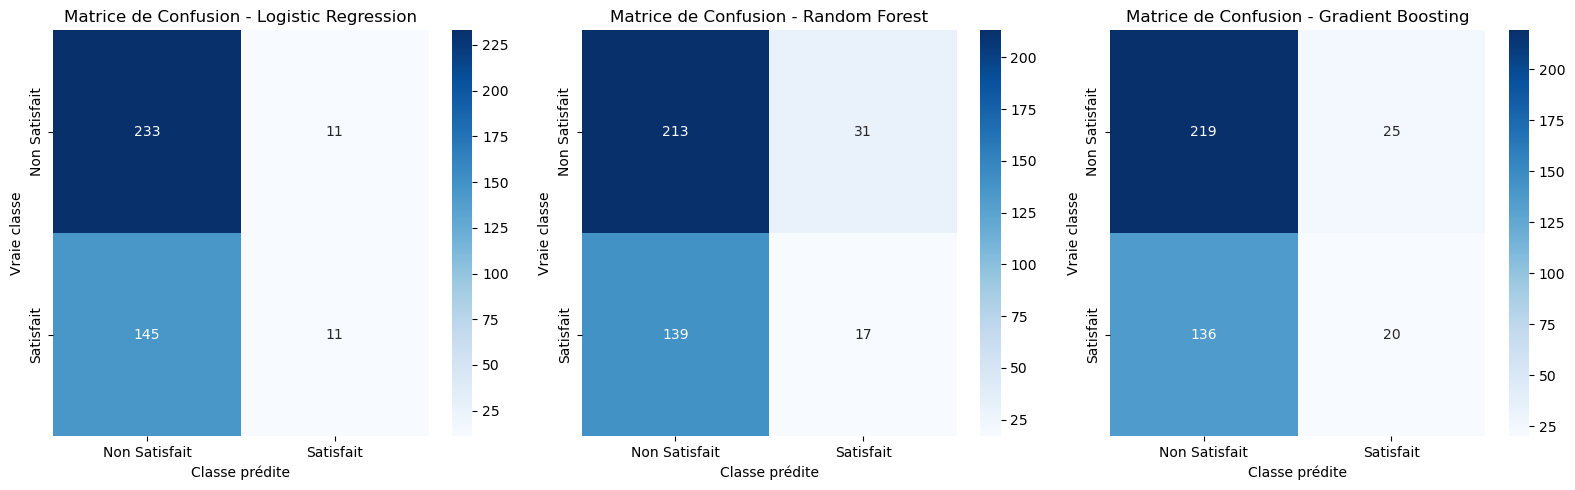

In [34]:
# Matrices de confusion
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models_preds = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

for idx, (name, y_pred) in enumerate(models_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Non Satisfait', 'Satisfait'],
                yticklabels=['Non Satisfait', 'Satisfait'])
    axes[idx].set_title(f'Matrice de Confusion - {name}')
    axes[idx].set_ylabel('Vraie classe')
    axes[idx].set_xlabel('Classe prédite')

plt.tight_layout()
plt.show()

In [35]:
# Courbes ROC

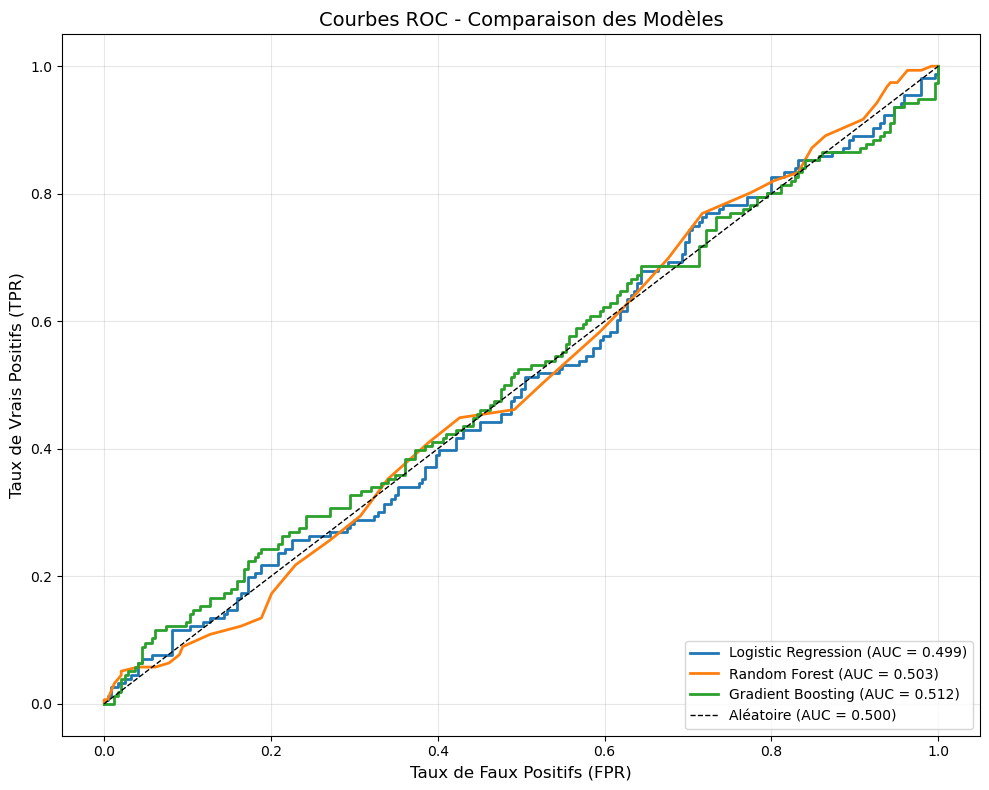

In [36]:
# Courbes ROC
plt.figure(figsize=(10, 8))

models_proba = [
    ('Logistic Regression', y_pred_proba_lr),
    ('Random Forest', y_pred_proba_rf),
    ('Gradient Boosting', y_pred_proba_gb)
]

for name, y_pred_proba in models_proba:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.500)', linewidth=1)
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

IMPORTANCE DES VARIABLES (RANDOM FOREST)
                  Feature  Importance
              prix_billet    0.064554
         retard_par_heure    0.062130
    efficacite_economique    0.061566
          carburant_litre    0.060356
          vitesse_moyenne    0.060134
            revenu_trajet    0.059363
            retard_par_km    0.058247
              distance_km    0.058188
           duree_prevue_h    0.056550
               retard_min    0.056519
             conso_par_km    0.056357
             nb_passagers    0.042408
         taux_remplissage    0.040044
             capacite_bus    0.023842
      periode_depart_Soir    0.010221
periode_depart_Après-midi    0.009553
             type_bus_VIP    0.009423
  condition_route_Moyenne    0.009106
       type_bus_Climatisé    0.008987
    ville_depart_Atakpamé    0.008838


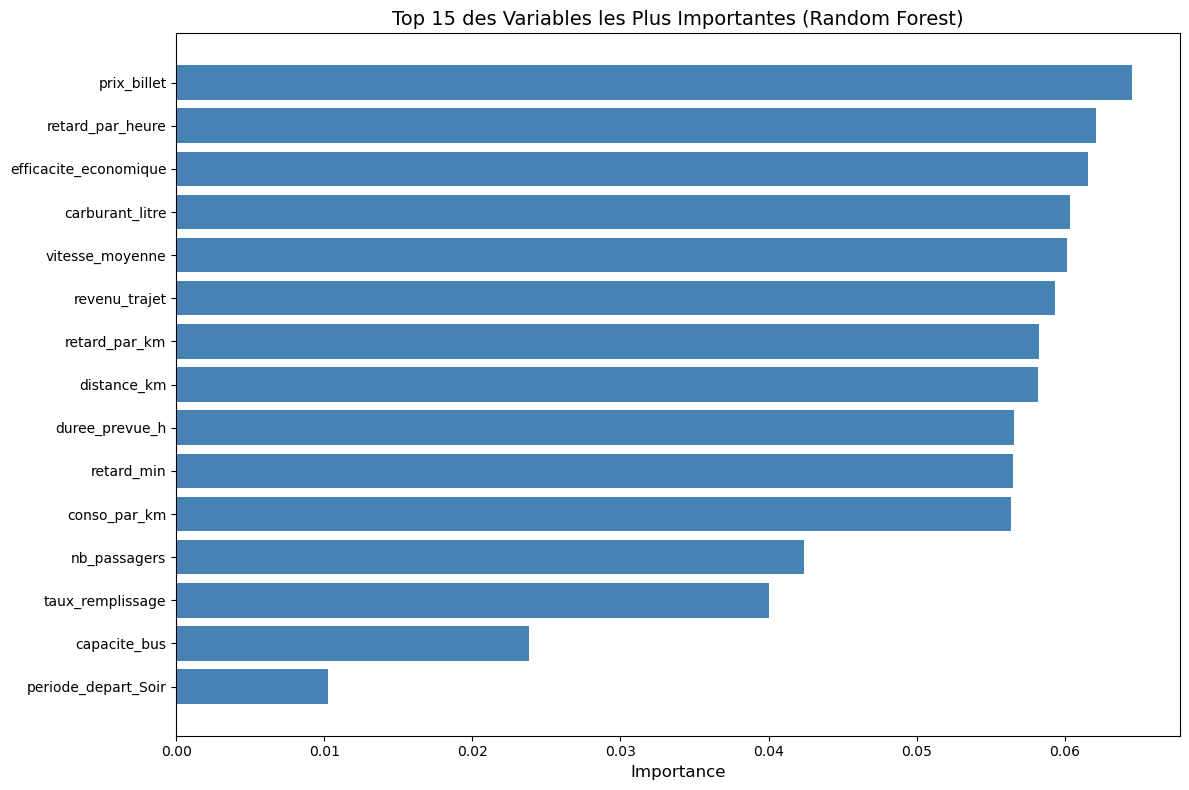

In [37]:
# Feature Importance pour Random Forest
print("IMPORTANCE DES VARIABLES (RANDOM FOREST)")
print("="*60)

# Récupération du modèle entraîné
rf_model = rf_pipeline.named_steps['classifier']

# Récupération des noms de features après transformation
feature_names = numeric_features.copy()

# Ajout des features one-hot encodées
onehot_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature_names.extend(cat_feature_names)

# Création du DataFrame d'importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(20).to_string(index=False))

# Visualisation (Top 15)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 des Variables les Plus Importantes (Random Forest)', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [39]:
# Analyse des erreurs
print("ANALYSE DES ERREURS (RANDOM FOREST)")

# Identification des erreurs
errors = X_test.copy()
errors['vraie_classe'] = y_test.values
errors['prediction'] = y_pred_rf
errors['correct'] = (errors['vraie_classe'] == errors['prediction'])

# Statistiques
total_errors = (~errors['correct']).sum()
error_rate = total_errors / len(errors) * 100

print(f"Nombre d'erreurs: {total_errors} / {len(errors)} ({error_rate:.2f}%)")

# Faux Positifs (prédit Satisfait, mais Non Satisfait)
false_positives = errors[(errors['vraie_classe'] == 0) & (errors['prediction'] == 1)]
print(f"\nFaux Positifs: {len(false_positives)}")

# Faux Négatifs (prédit Non Satisfait, mais Satisfait)
false_negatives = errors[(errors['vraie_classe'] == 1) & (errors['prediction'] == 0)]
print(f"Faux Négatifs: {len(false_negatives)}")

# Analyse des caractéristiques des erreurs
if len(false_negatives) > 0:
    print(f"\nCaractéristiques moyennes des FAUX NÉGATIFS:")
    print(f"  Retard moyen: {false_negatives['retard_min'].mean():.2f} min")
    print(f"  Taux remplissage moyen: {false_negatives['taux_remplissage'].mean():.2f}%")
    print(f"  Distance moyenne: {false_negatives['distance_km'].mean():.2f} km")

ANALYSE DES ERREURS (RANDOM FOREST)
Nombre d'erreurs: 170 / 400 (42.50%)

Faux Positifs: 31
Faux Négatifs: 139

Caractéristiques moyennes des FAUX NÉGATIFS:
  Retard moyen: 90.12 min
  Taux remplissage moyen: 70.78%
  Distance moyenne: 360.42 km


In [40]:
# Recommandations métier
print("="*80)
print(" "*20 + "RECOMMANDATIONS POUR LA COMPAGNIE LK")
print("="*80)

print("\n📊 RÉSULTATS DE L'ANALYSE:")
print("-"*80)
print(f"✓ Modèle recommandé: {best_model}")
print(f"✓ Taux de prédiction correct: {best_accuracy*100:.2f}%")
print(f"✓ Variables les plus importantes identifiées")

print("\n🎯 INSIGHTS CLÉS:")
print("-"*80)
print("1. GESTION DU RETARD:")
print("   - Le retard est un facteur majeur de l'insatisfaction")
print("   - Analyser les trajets avec retard > 30 min")
print("   - Améliorer la ponctualité sur les axes critiques")

print("\n2. OPTIMISATION DU REMPLISSAGE:")
print(f"   - Taux de remplissage moyen: {df_clean['taux_remplissage'].mean():.1f}%")
print(f"   - Trajets sous-utilisés (<50%): {(df_clean['taux_remplissage'] < 50).sum()}")
print("   - Ajuster la capacité selon la demande prévisionnelle")

print("\n3. EFFICACITÉ ÉCONOMIQUE:")
print("   - Identifier les trajets à faible rentabilité")
print("   - Optimiser la consommation de carburant")
print("   - Prioriser les axes à fort revenu")

print("\n4. CONDITIONS DE ROUTE:")
print("   - Surveiller l'état des routes sur les axes problématiques")
print("   - Adapter les horaires selon les conditions")

print("\n💡 ACTIONS RECOMMANDÉES:")
print("-"*80)
print("➤ Mettre en place un système de prédiction en temps réel")
print("➤ Créer des alertes pour les trajets à risque")
print("➤ Ajuster dynamiquement les capacités de bus")
print("➤ Améliorer la communication avec les clients sur les retards")
print("➤ Former les chauffeurs sur l'efficacité énergétique")

print("\n" + "="*80)

                    RECOMMANDATIONS POUR LA COMPAGNIE LK

📊 RÉSULTATS DE L'ANALYSE:
--------------------------------------------------------------------------------
✓ Modèle recommandé: Logistic Regression
✓ Taux de prédiction correct: 61.00%
✓ Variables les plus importantes identifiées

🎯 INSIGHTS CLÉS:
--------------------------------------------------------------------------------
1. GESTION DU RETARD:
   - Le retard est un facteur majeur de l'insatisfaction
   - Analyser les trajets avec retard > 30 min
   - Améliorer la ponctualité sur les axes critiques

2. OPTIMISATION DU REMPLISSAGE:
   - Taux de remplissage moyen: 70.2%
   - Trajets sous-utilisés (<50%): 538
   - Ajuster la capacité selon la demande prévisionnelle

3. EFFICACITÉ ÉCONOMIQUE:
   - Identifier les trajets à faible rentabilité
   - Optimiser la consommation de carburant
   - Prioriser les axes à fort revenu

4. CONDITIONS DE ROUTE:
   - Surveiller l'état des routes sur les axes problématiques
   - Adapter les horai

In [41]:
# Sauvegarde du meilleur modèle
import joblib

# Sauvegarder le modèle Random Forest (le meilleur)
joblib.dump(rf_pipeline, 'modele_satisfaction_LK.pkl')
print("✓ Modèle sauvegardé: modele_satisfaction_LK.pkl")

# Sauvegarder aussi les données nettoyées
df_clean.to_csv('donnees_nettoyees_LK.csv', index=False)
print("✓ Données nettoyées sauvegardées: donnees_nettoyees_LK.csv")

print("\n" + "="*60)
print("PROJET TERMINÉ AVEC SUCCÈS!")
print("="*60)
print("\nFichiers générés:")
print("  1. modele_satisfaction_LK.pkl - Modèle entraîné")
print("  2. donnees_nettoyees_LK.csv - Dataset nettoyé")
print("\nPour utiliser le modèle:")
print("  model = joblib.load('modele_satisfaction_LK.pkl')")
print("  predictions = model.predict(nouvelles_donnees)")

✓ Modèle sauvegardé: modele_satisfaction_LK.pkl
✓ Données nettoyées sauvegardées: donnees_nettoyees_LK.csv

PROJET TERMINÉ AVEC SUCCÈS!

Fichiers générés:
  1. modele_satisfaction_LK.pkl - Modèle entraîné
  2. donnees_nettoyees_LK.csv - Dataset nettoyé

Pour utiliser le modèle:
  model = joblib.load('modele_satisfaction_LK.pkl')
  predictions = model.predict(nouvelles_donnees)
